# StyleGan Results

Below are fingings from running batchjobs using [stylgan2-adda-pytorch](https://github.com/NVlabs/stylegan2-ada-pytorch)'s generator. This experiment was run on machines with different GPUs to analyze the carbon footprint of generating images with the model. Our model is generating images from within the library. The finding of this experiment could be extrapolated past generating images to generating video ina naive way.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
# Load emissions data
prefix="0430_185702_100_50"

df = pd.read_csv(prefix + ".csv/emissions.csv")
df = df.iloc[10:,]
df.head()

,timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
10,2025-04-28T21:31:06,StyleGAN2-ADA-PyTorch-Generation,6e93e50e-568a-4074-8df3-fe28058556e8,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,8.005956,0.000318,0.000040,38.940808,62.691735,10.0,...,1,Intel(R) Xeon(R) Platinum 8358 CPU @ 2.60GHz,1.0,1 x NVIDIA A100 80GB PCIe,-71.0863,42.3687,4.0,machine,N,1.0
11,2025-04-28T21:33:10,StyleGAN2-ADA-PyTorch-Generation,2c0100b8-fca4-4f55-aa35-ce4e7a90bc15,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,5.189597,0.000213,0.000041,53.917984,63.108306,10.0,...,1,Intel(R) Xeon(R) Platinum 8358 CPU @ 2.60GHz,1.0,1 x NVIDIA A100 80GB PCIe,-71.0863,42.3687,4.0,machine,N,1.0
12,2025-04-28T21:36:20,StyleGAN2-ADA-PyTorch-Generation,c57f14f4-32a3-4783-9782-8103f5057161,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,5.790660,0.000212,0.000037,46.372315,65.719814,10.0,...,1,Intel(R) Xeon(R) Platinum 8358 CPU @ 2.60GHz,1.0,1 x NVIDIA A100 80GB PCIe,-71.0863,42.3687,4.0,machine,N,1.0
13,2025-04-28T21:46:44,StyleGAN2-ADA-PyTorch-Generation,fb85d7dc-b15b-4370-bd09-38f15559f20b,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,5.321486,0.000204,0.000038,49.421348,64.647836,10.0,...,1,Intel(R) Xeon(R) Platinum 8358 CPU @ 2.60GHz,1.0,1 x NVIDIA A100 80GB PCIe,-71.0863,42.3687,4.0,machine,N,1.0
14,2025-04-28T21:49:53,StyleGAN2-ADA-PyTorch-Generation,bc77ceb2-d83a-47c0-8e39-ea197a846c6b,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,55.012922,0.002109,0.000038,287.909672,77.161000,10.0,...,1,Intel(R) Xeon(R) Platinum 8358 CPU @ 2.60GHz,1.0,1 x NVIDIA A100 80GB PCIe,-71.0863,42.3687,4.0,machine,N,1.0


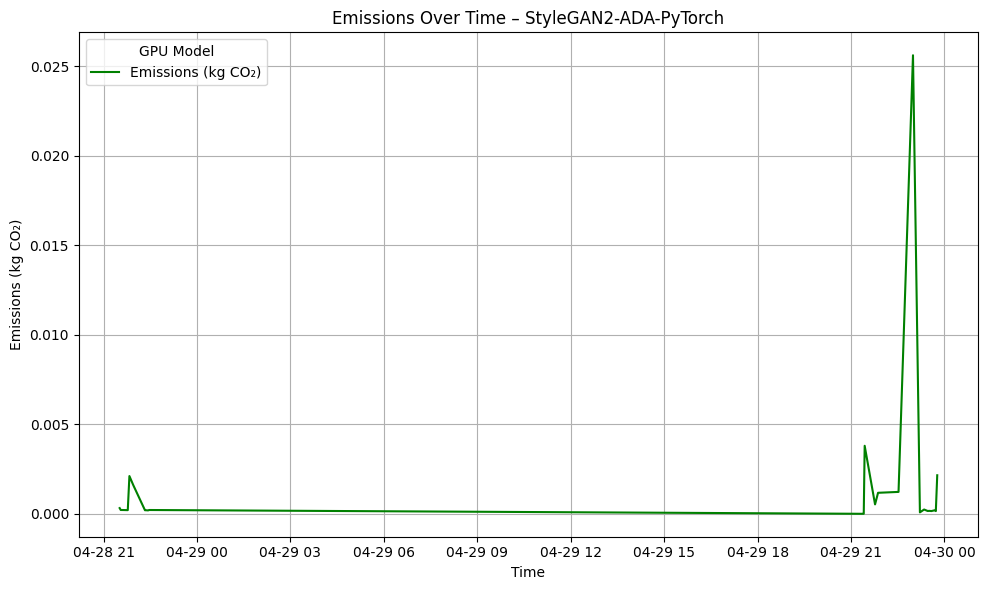

In [10]:
# Convert timestamps to datetime objects
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Calculate time delta in seconds from the first timestamp
df["elapsed_seconds"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()


# Plot emissions over time   
plt.figure(figsize=(10, 6))
plt.plot(df["timestamp"], df["emissions"], label="Emissions (kg CO₂)", color="green")
plt.xlabel("Time")
plt.ylabel("Emissions (kg CO₂)")
plt.title("Emissions Over Time – StyleGAN2-ADA-PyTorch")
plt.legend(title="GPU Model", loc="upper left") 
plt.grid(True)
plt.tight_layout()
plt.show()

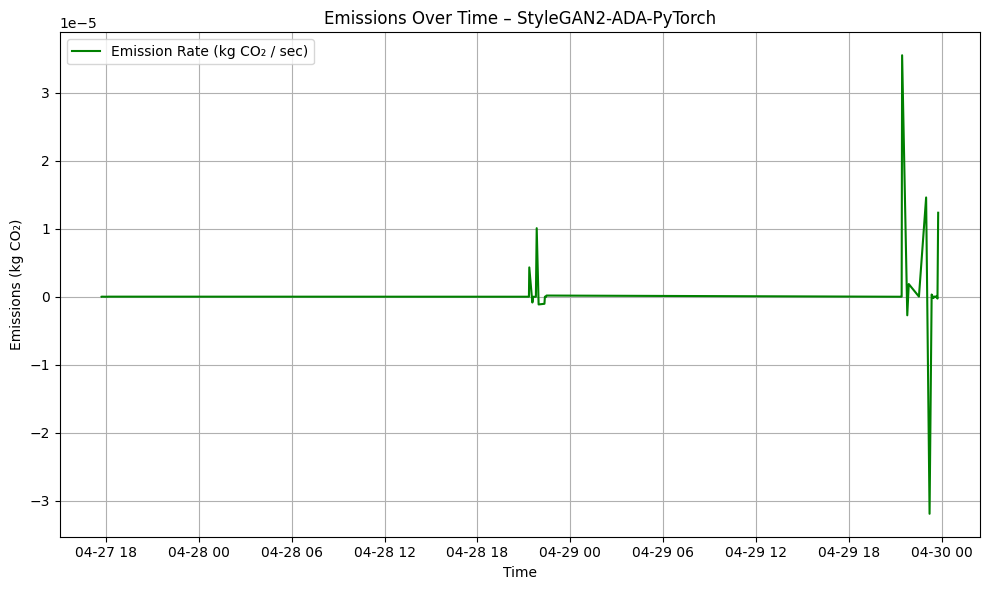

In [21]:
df["emission_rate"] = df["emissions"].diff() / df["elapsed_seconds"].diff()

# Plot emissions over time
plt.figure(figsize=(10, 6))
plt.plot(df["timestamp"], df["emission_rate"], label="Emission Rate (kg CO₂)", color="green")
plt.xlabel("Time")
plt.ylabel("Emissions (kg CO₂)")
plt.title("Emissions Over Time – StyleGAN2-ADA-PyTorch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()